<a href="https://colab.research.google.com/github/mohdsyed/Computer-Vision-Image-Classification-project/blob/master/Image_Classification_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Jan 23 13:41:42 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch

In [ ]:
torch.__version__

'2.5.1+cu121'

In [ ]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [ ]:
## Load data

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform= ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform= ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.9MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.78MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.28MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size= batch_size)
test_dataloader = DataLoader(test_data, batch_size= batch_size)

In [ ]:
train_dataloader

In [ ]:
for x, y in test_dataloader:
  print(x,y)

Streaming output truncated to the last 5000 lines.
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        ...,


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Defina our ANN model

class NeuralNetworks(nn.Module):
  def __init__(self):
    super(NeuralNetworks, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )



  def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits




In [ ]:
model = NeuralNetworks().to(device)
print(model)

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
1e-3

0.001

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [ ]:
## train loop

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
## Start training

epochs = 10

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print("Done!")

Epoch 1
-------------------------------
loss: 2.312201  [    0/60000]
loss: 2.296075  [ 6400/60000]
loss: 2.275271  [12800/60000]
loss: 2.263513  [19200/60000]
loss: 2.254131  [25600/60000]
loss: 2.209285  [32000/60000]
loss: 2.214696  [38400/60000]
loss: 2.182883  [44800/60000]
loss: 2.190014  [51200/60000]
loss: 2.144966  [57600/60000]
Test Error: 
 Accuracy: 52.3%, Avg loss: 2.143574 

Epoch 2
-------------------------------
loss: 2.158730  [    0/60000]
loss: 2.146892  [ 6400/60000]
loss: 2.085776  [12800/60000]
loss: 2.097150  [19200/60000]
loss: 2.053194  [25600/60000]
loss: 1.980072  [32000/60000]
loss: 1.999633  [38400/60000]
loss: 1.926349  [44800/60000]
loss: 1.937388  [51200/60000]
loss: 1.849592  [57600/60000]
Test Error: 
 Accuracy: 60.9%, Avg loss: 1.853892 

Epoch 3
-------------------------------
loss: 1.895665  [    0/60000]
loss: 1.860777  [ 6400/60000]
loss: 1.738556  [12800/60000]
loss: 1.772442  [19200/60000]
loss: 1.678482  [25600/60000]
loss: 1.616228  [32000/600

In [ ]:
## Save model

torch.save(model.state_dict(), "model.pth")
print("Model saved!")

Model saved!


In [ ]:
## Load model

model = NeuralNetworks()
model.load_state_dict(torch.load("model.pth"))

<ipython-input-23-147d9a0e9368>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


<All keys matched successfully>

In [ ]:
## Prediction classes:


classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"

]

In [ ]:
classes[0]

'T-shirt/top'

In [ ]:
len(classes)

10

In [ ]:
model.eval()

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [ ]:
x, y = test_data[0][0], test_data[0][1]

In [ ]:
y

9

In [ ]:
with torch.no_grad():
  pred = model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


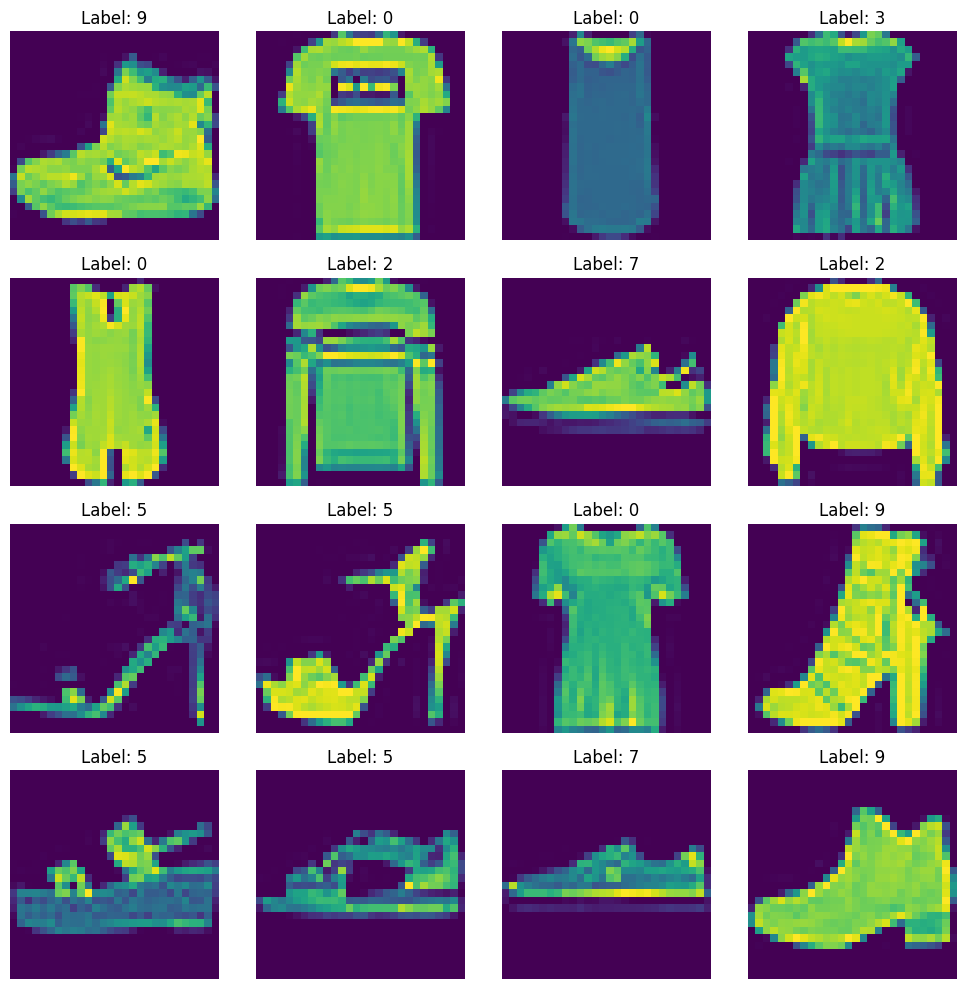

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Loop through the training dataloader to get a batch
for images, labels in train_dataloader:
    break  # Get the first batch and exit loop

# Convert the images to numpy arrays
images = images.numpy()

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(np.transpose(images[i], (1, 2, 0)))
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Data Augmantation

In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor

p = Augmentor.Pipeline("/content/images")
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(10)

Initialised with 2 image(s) found.
Output directory set to /content/images/output.

Processing <PIL.Image.Image image mode=RGB size=500x753 at 0x7E765CBD1490>: 100%|██████████| 10/10 [00:00<00:00, 35.79 Samples/s]
